<a href="https://colab.research.google.com/github/Satwikram/Feature-Selection/blob/main/Feature%20Selection%20Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Author: Satwik Ram K

### Imports

In [19]:
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression

from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

from sklearn.metrics import *

import plotly.express as px

### Loading Dataset

In [2]:
df = pd.read_csv("/content/dataset.csv")

In [3]:
df.head()

,alpha_ec_0,alpha_ec_1,alpha_ec_2,alpha_ec_3,alpha_ec_4,alpha_ec_5,alpha_ec_6,alpha_ec_7,alpha_ec_8,alpha_ec_9,...,ratio_theta_39,ratio_theta_40,ratio_theta_41,ratio_theta_42,ratio_theta_43,ratio_theta_44,ratio_theta_45,ratio_theta_46,ratio_theta_47,labels
0,0.112,0.124,0.129,0.113,0.106,0.107,0.108,0.111,0.109,0.159,...,0.739,0.587,0.552,0.548,0.579,0.593,0.604,0.563,1.010,0.0
1,0.298,0.269,0.262,0.380,0.344,0.285,0.248,0.250,0.260,0.260,...,0.328,0.432,0.496,0.407,0.313,0.664,0.584,0.467,0.749,0.0
2,0.369,0.396,0.390,0.258,0.406,0.442,0.440,0.399,0.315,0.283,...,0.865,1.090,0.318,0.364,0.506,0.335,0.494,0.624,0.614,0.0
3,0.761,0.777,0.770,0.602,0.702,0.727,0.762,0.789,0.730,0.522,...,0.251,0.432,0.713,0.533,0.285,0.681,0.663,0.253,0.854,0.0
4,0.168,0.151,0.147,0.157,0.150,0.142,0.132,0.128,0.144,0.173,...,1.730,1.240,2.760,3.010,2.440,2.530,2.580,2.010,2.290,0.0


### Taking X and Y

In [4]:
X = df.drop("labels", axis=1)
y = df["labels"]

### Splitting Dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Pre-Processing

In [6]:
sc = StandardScaler()

In [7]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
X_train

array([[ 1.34704064,  1.09923367,  0.93896227, ..., -0.90726301,
        -0.92109706, -0.87442269],
       [-1.37733747, -1.35593698, -1.3533501 , ..., -0.55781888,
        -0.54854731, -0.1049701 ],
       [ 0.64608572,  0.64334125,  0.87596003, ...,  0.42932678,
         0.22442007,  1.15334524],
       ...,
       [ 0.2862622 ,  0.13996003, -0.02545668, ..., -0.01937579,
        -0.24493394,  1.94883195],
       [-0.96611058, -0.71008938, -0.53432095, ..., -0.19885682,
         0.23908738, -0.97277378],
       [-0.05954223, -0.14497274, -0.08845892, ..., -0.13767011,
        -0.08212677, -0.75293018]])

### LOOCV for Evaluating Machine Learning Algorithms

In [9]:
cv = LeaveOneOut()

In [10]:
def loocv(model, cv, X_train, y_train):
  scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
  print('Accuracy: %.3f (%.3f)' % (scores.mean(), scores.std()))

### Metrics for Performance Evaluation

In [35]:
def report(model, X_test, y_test):
  
  y_pred = model.predict(X_test)
  disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
  disp.plot()
  print(classification_report(y_test, y_pred))


### KNN without Feature Selection

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91        20
         1.0       1.00      0.75      0.86        16

    accuracy                           0.89        36
   macro avg       0.92      0.88      0.88        36
weighted avg       0.91      0.89      0.89        36



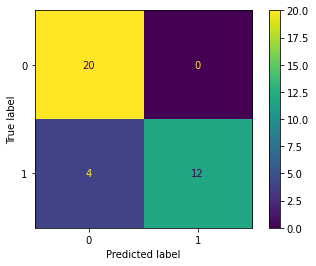

In [36]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
report(knn, X_test, y_test)

### LOOCV KNN without Feature Selection

In [37]:
loocv(knn, cv, X_train, y_train)

Accuracy: 0.854 (0.353)


### SVM without Feature Selection

In [38]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93        20
         1.0       1.00      0.81      0.90        16

    accuracy                           0.92        36
   macro avg       0.93      0.91      0.91        36
weighted avg       0.93      0.92      0.92        36



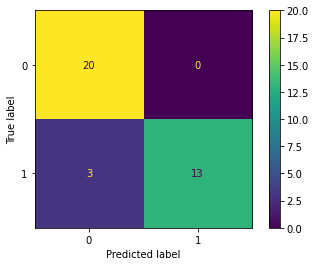

In [39]:
report(svm, X_test, y_test)

### LOOCV SVM without Feature Selection

In [40]:
loocv(svm, cv, X_train, y_train)

Accuracy: 0.861 (0.346)


### Feature Selection

In [41]:
num_feats = 30

#### Pearson Correlation

In [42]:
def cor_selector(X, y, num_feats):
    
    cor_list = []
    feature_name = X.columns.tolist()
    
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature


cor_support, cor_feature = cor_selector(X, y, num_feats)
print(str(len(cor_feature)), 'selected features:', cor_feature)

30 selected features: ['alpha_ec_34', 'alpha_ec_16', 'ratio_beta_41', 'ratio_beta_5', 'alpha_ec_30', 'ratio_beta_8', 'theta_ec_25', 'ratio_beta_10', 'ratio_beta_33', 'ratio_beta_1', 'ratio_beta_13', 'alpha_ec_31', 'ratio_beta_30', 'ratio_beta_36', 'ratio_beta_26', 'ratio_beta_38', 'alpha_ec_23', 'ratio_beta_6', 'ratio_beta_7', 'alpha_ec_17', 'ratio_beta_21', 'alpha_ec_25', 'ratio_beta_47', 'ratio_beta_29', 'ratio_beta_0', 'ratio_beta_2', 'ratio_beta_4', 'ratio_beta_37', 'ratio_beta_35', 'ratio_beta_34']


In [72]:
fig = px.treemap(pd.DataFrame({"Features": cor_feature}), path=["Features"], title=f'Top {num_feats} features using Pearson Correlation')
fig.show()

In [73]:
cor_feature.append("labels")

In [74]:
cor_feature

['alpha_ec_34',
 'alpha_ec_16',
 'ratio_beta_41',
 'ratio_beta_5',
 'alpha_ec_30',
 'ratio_beta_8',
 'theta_ec_25',
 'ratio_beta_10',
 'ratio_beta_33',
 'ratio_beta_1',
 'ratio_beta_13',
 'alpha_ec_31',
 'ratio_beta_30',
 'ratio_beta_36',
 'ratio_beta_26',
 'ratio_beta_38',
 'alpha_ec_23',
 'ratio_beta_6',
 'ratio_beta_7',
 'alpha_ec_17',
 'ratio_beta_21',
 'alpha_ec_25',
 'ratio_beta_47',
 'ratio_beta_29',
 'ratio_beta_0',
 'ratio_beta_2',
 'ratio_beta_4',
 'ratio_beta_37',
 'ratio_beta_35',
 'ratio_beta_34',
 'labels',
 'labels']

In [75]:
cor_df = df[cor_feature]
X_cor_selected = cor_df.drop("labels", axis=1)
y_cor_selected = cor_df["labels"]

In [76]:
X_cor_train, X_cor_test, y_cor_train, y_cor_test = train_test_split(X_cor_selected, y_cor_selected, test_size=0.2, random_state=42, stratify=y_cor_selected)

#### KNN with Pearson Correlation Feature Selection

In [77]:
knn_cor = KNeighborsClassifier(n_neighbors=2)
knn_cor.fit(X_cor_train, y_cor_train)
report(knn_cor, X_cor_test, y_cor_test)

ValueError: ignored

#### LOOCV KNN with Pearson Correlation Feature Selection

In [78]:
loocv(knn_cor, cv, X_cor_train, y_cor_train)

Accuracy: 0.660 (0.474)


#### SVM with Pearson Correlation Feature Selection

In [79]:
svm_cor = SVC()
svm_cor.fit(X_cor_train, y_cor_train)
report(svm_cor, X_cor_test, y_cor_test)

ValueError: ignored

#### LOOCV SVM with Pearson Correlation Feature Selection

In [ ]:
loocv(svm_cor, cv, X_cor_train, y_cor_train)

### Selecting features using Lasso regularisation using SelectFromModel

In [80]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l2'))
sel_.fit(X_train, y_train)

SelectFromModel(estimator=LogisticRegression(C=1))

#### Visualising features that were kept by the lasso regularisation

In [81]:
sel_.get_support()

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False,  True,  True,
        True, False, False,  True,  True,  True, False,  True, False,
       False, False, False, False,  True, False, False, False,  True,
       False,  True, False,  True, False, False,  True, False,  True,
        True, False, False, False,  True,  True, False,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True, False, False,  True, False,
       False, False,  True,  True, False, False, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
        True, False,  True,  True, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False,  True,
        True, False, False, False,  True,  True, False, False,  True,
       False, False,

#### Make a list of with the selected features

In [82]:
selected_feat = X.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 432
selected features: 186
features with coefficients shrank to zero: 0


### Identifying the removed features

In [83]:
X.columns, sel_.get_support()

(Index(['alpha_ec_0', 'alpha_ec_1', 'alpha_ec_2', 'alpha_ec_3', 'alpha_ec_4',
        'alpha_ec_5', 'alpha_ec_6', 'alpha_ec_7', 'alpha_ec_8', 'alpha_ec_9',
        ...
        'ratio_theta_38', 'ratio_theta_39', 'ratio_theta_40', 'ratio_theta_41',
        'ratio_theta_42', 'ratio_theta_43', 'ratio_theta_44', 'ratio_theta_45',
        'ratio_theta_46', 'ratio_theta_47'],
       dtype='object', length=432),
 array([False, False, False, False, False,  True, False, False, False,
        False, False, False, False, False,  True, False,  True,  True,
         True, False, False,  True,  True,  True, False,  True, False,
        False, False, False, False,  True, False, False, False,  True,
        False,  True, False,  True, False, False,  True, False,  True,
         True, False, False, False,  True,  True, False,  True,  True,
         True,  True, False, False,  True,  True,  True,  True,  True,
        False,  True, False,  True,  True, False, False,  True, False,
        False, False,  

In [84]:
selected = []
for i, v in enumerate(sel_.get_support()):
  if v:
    selected.append(i)

In [85]:
df_l2 = df[df.columns[selected]]
X_l2 = df_l2
y_l2 = df["labels"]

In [86]:
fig = px.treemap(pd.DataFrame({"Features": df.columns[selected]}), path=["Features"], title=f'Top {len(selected)} features using L2 Regulization')
fig.show()

In [58]:
X_l2_train, X_l2_test, y_l2_train, y_l2_test = train_test_split(X_l2, y_l2, test_size=0.2, random_state=42, stratify=y_l2)

#### KNN with L2 Regulization Feature Selection

              precision    recall  f1-score   support

         0.0       0.69      1.00      0.82        20
         1.0       1.00      0.44      0.61        16

    accuracy                           0.75        36
   macro avg       0.84      0.72      0.71        36
weighted avg       0.83      0.75      0.72        36



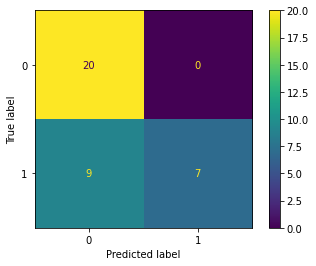

In [59]:
knn_l2 = KNeighborsClassifier(n_neighbors=2)
knn_l2.fit(X_l2_train, y_l2_train)
report(knn_l2, X_l2_test, y_l2_test)

#### LOOCV KNN with L2 Regulization Feature Selection

In [60]:
loocv(knn_l2, cv, X_l2_train, y_l2_train)

Accuracy: 0.736 (0.441)


#### SVM with L2 Regulization Feature Selection

              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85        20
         1.0       0.81      0.81      0.81        16

    accuracy                           0.83        36
   macro avg       0.83      0.83      0.83        36
weighted avg       0.83      0.83      0.83        36



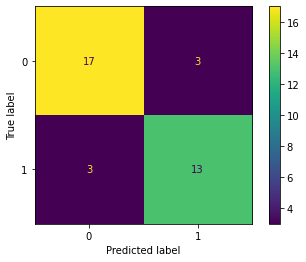

In [61]:
svm_l2 = SVC()
svm_l2.fit(X_l2_train, y_l2_train)
report(svm_l2, X_l2_test, y_l2_test)

#### LOOCV SVM with L2 Regulization Feature Selection

In [62]:
loocv(svm_l2, cv, X_l2_train, y_l2_train)

Accuracy: 0.694 (0.461)
